In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
# Importing the dataset
df = pd.read_csv('../Data/Complete_DATASET.csv')

In [6]:
df['customer_age'].describe()

count    31161.000000
mean        27.506499
std          7.160898
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

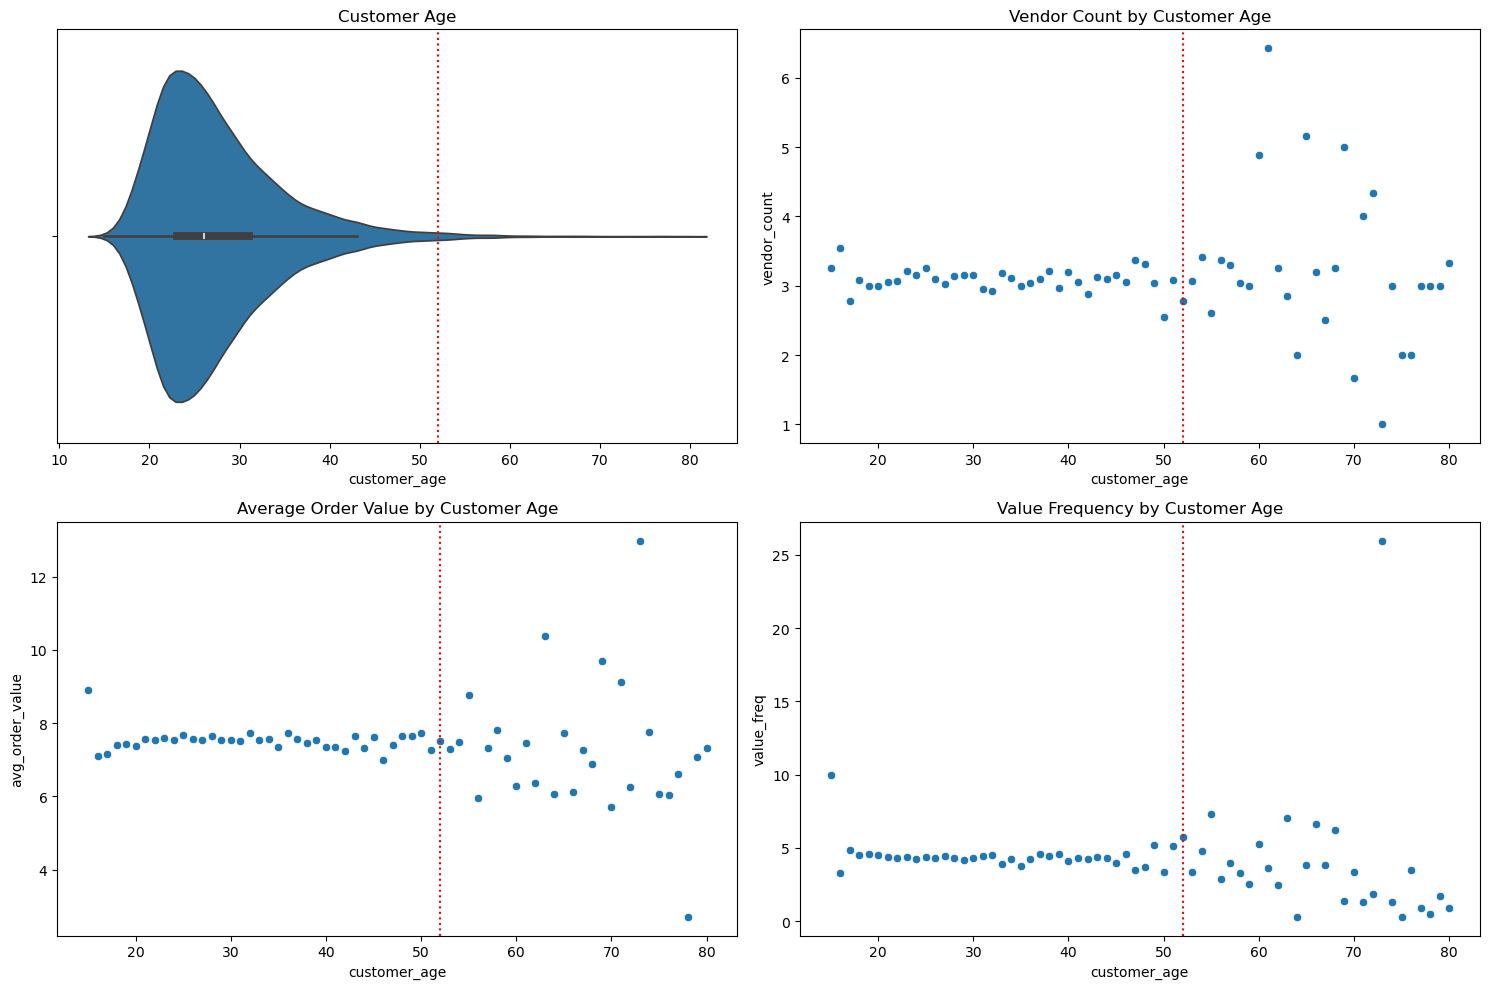

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.violinplot(data=df, x='customer_age', ax=axes[0, 0])
percentile_99 = df['customer_age'].quantile(0.99)
axes[0, 0].axvline(percentile_99, color='red', linestyle='dotted')
axes[0, 0].set_title('Customer Age')

age_vendor_mean = df.groupby('customer_age')['vendor_count'].mean().reset_index()
sns.scatterplot(data=age_vendor_mean, x='customer_age', y='vendor_count', ax=axes[0, 1])
axes[0, 1].axvline(percentile_99, color='red', linestyle='dotted')
axes[0, 1].set_title('Vendor Count by Customer Age')

age_order_value_mean = df.groupby('customer_age')['avg_order_value'].mean().reset_index()
sns.scatterplot(data=age_order_value_mean, x='customer_age', y='avg_order_value', ax=axes[1, 0])
axes[1, 0].axvline(percentile_99, color='red', linestyle='dotted')
axes[1, 0].set_title('Average Order Value by Customer Age')

age_value_freq = df.groupby('customer_age')['value_freq'].mean().reset_index()
sns.scatterplot(data=age_value_freq, x='customer_age', y='value_freq', ax=axes[1, 1])
axes[1, 1].axvline(percentile_99, color='red', linestyle='dotted')
axes[1, 1].set_title('Value Frequency by Customer Age')

plt.tight_layout()
plt.show()

The customer age distribution leans heavily towards the younger demographic. This can lead to potential misinterpretations when analyzing the visual representation of our data. It's crucial to remember that 99% of our customer base is under 52, which explains the more scattered results for the remaining 1% of our graph.

The insights we can glean from these charts are that nearly 99% of our user base is younger than 50, but age does not appear to significantly influence spending frequency or habit


????? can I use a regression to corroborate my thesis?

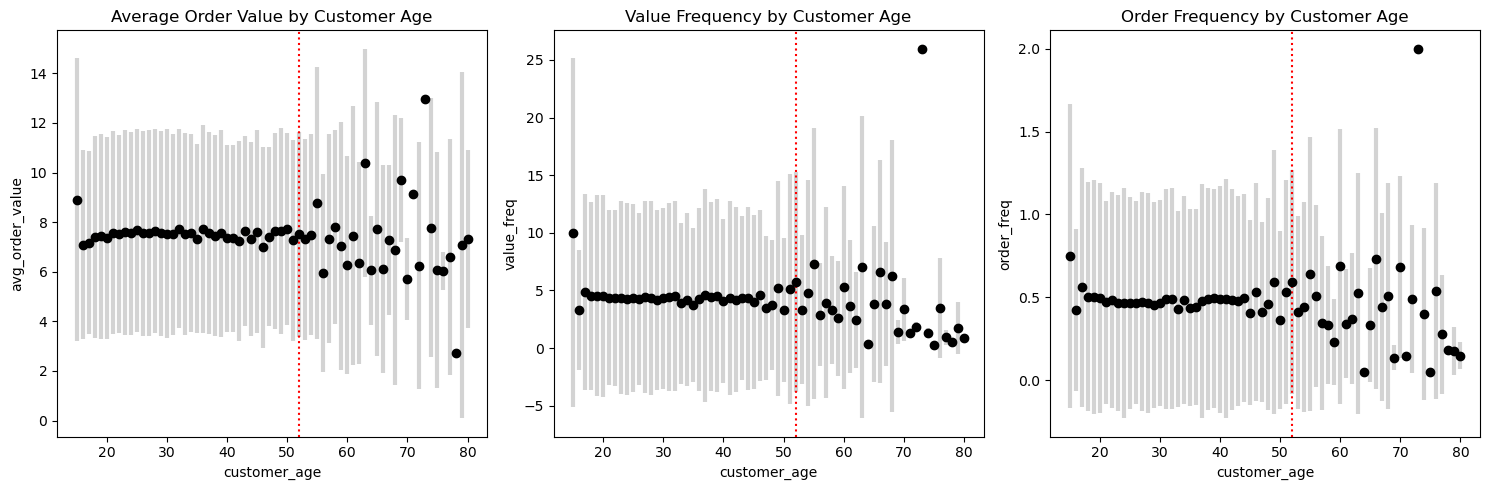

In [10]:
# show the last 3 scatterplots og the previous figure with error bars
fig, axes = plt.subplots(1, 3, figsize=(15, 5))




age_order_value_mean = df.groupby('customer_age')['avg_order_value'].mean().reset_index()
age_order_value_std = df.groupby('customer_age')['avg_order_value'].std().reset_index()
sns.scatterplot(data=age_order_value_mean, x='customer_age', y='avg_order_value', ax=axes[0])

axes[0].errorbar(age_order_value_mean['customer_age'], age_order_value_mean['avg_order_value'], yerr=age_order_value_std['avg_order_value'], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
axes[0].axvline(percentile_99, color='red', linestyle='dotted')
axes[0].set_title('Average Order Value by Customer Age')

age_value_freq = df.groupby('customer_age')['value_freq'].mean().reset_index()
age_value_freq_std = df.groupby('customer_age')['value_freq'].std().reset_index()
sns.scatterplot(data=age_value_freq, x='customer_age', y='value_freq', ax=axes[1])
axes[1].errorbar(age_value_freq['customer_age'], age_value_freq['value_freq'], yerr=age_value_freq_std['value_freq'], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

axes[1].axvline(percentile_99, color='red', linestyle='dotted')
axes[1].set_title('Value Frequency by Customer Age')

age_order_freq = df.groupby('customer_age')['order_freq'].mean().reset_index()
age_order_freq_std = df.groupby('customer_age')['order_freq'].std().reset_index()
sns.scatterplot(data=age_order_freq, x='customer_age', y='order_freq', ax=axes[2])
axes[2].errorbar(age_order_freq['customer_age'], age_order_freq['order_freq'], yerr=age_order_freq_std['order_freq'], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)

axes[2].axvline(percentile_99, color='red', linestyle='dotted')
axes[2].set_title('Order Frequency by Customer Age')

plt.tight_layout()
plt.show()
